In [ ]:
# Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("thyroidDF.csv")
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [ ]:
row, columns = df.shape
print(f'Total number of rows is: {row}')
print(f'Total number of columns is : {columns}')

Total number of rows is: 9172
Total number of columns is : 31


In [ ]:
# Total number of duplicate rows
df.duplicated().sum()


0

In [ ]:
# Total number of missing values in each column
df.isna().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
# Unique values in 'sex' column
df['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
#  Counts the frequency of each unique value in the 'sex' column
df['sex'].value_counts()

sex
F    6073
M    2792
Name: count, dtype: int64

In [ ]:
# Count of missing values in TSH
df['TSH'].isnull().sum()

842

In [ ]:
# Unique values in 'T3_measured' column
df['T3_measured'].unique()

array(['f', 't'], dtype=object)

In [ ]:
# Filters the 'T3' column for rows where 'T3_measured' is 'f' and extracts unique values
df['T3'][df['T3_measured'] == 'f'].unique()

array([nan])

In [ ]:
# Count of missing values in T3
df['T3'].isnull().sum()

2604

In [ ]:
# Unique values in 'TT4_measured' column
df['TT4_measured'].unique()

array(['f', 't'], dtype=object)

In [ ]:
# Filters the 'TT4' column for rows where 'TT4_measured' is 'f' and extracts unique values
df['TT4'][df['TT4_measured'] == 'f'].unique()

array([nan])

In [ ]:
df['TT4'][df['TT4_measured'] == 'f'].isnull().sum()

442

Feature Engineering

In [ ]:
# Unique classes in 'target' column
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [ ]:
# Categorizing different classes into 3 major thyroid conditions: Hyperthyroid, Hypothyroid and Negative (No Thyroid Condition)
hyperthyroid_conditions = ['A', 'B', 'C', 'D', 'O', 'P', 'Q', 'S', 'T']
hypothyroid_conditions = ['E', 'F', 'G', 'H']
normal_conditions = ['-']

def categorize_target(value):
    # Split the diagnosis into parts for compound cases
    diagnoses = value.split('|')
    # Check for hyperthyroid conditions
    for diagnosis in diagnoses:
        if diagnosis in hyperthyroid_conditions:
            return 'Hyperthyroid'
    # Check for hypothyroid conditions
    for diagnosis in diagnoses:
        if diagnosis in hypothyroid_conditions:
            return 'Hypothyroid'
            
    for diagnosis in diagnoses:
        if diagnosis in normal_conditions:
            return 'Negative'

#Applying 'categorize_target' function on 'target' column to categorize the values into 3 classes
df['target'] = df['target'].apply(categorize_target)

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [ ]:
#Unique Classes in 'target' column
df['target'].unique()

array(['Negative', 'Hyperthyroid', 'Hypothyroid', None], dtype=object)

In [ ]:
#  Counts the frequency of each unique classes in the 'target' column
df['target'].value_counts()

target
Negative        6771
Hypothyroid      601
Hyperthyroid     313
Name: count, dtype: int64

In [ ]:
# Count the missing values in 'target' column
df['target'].isnull().sum()

1487

In [ ]:
# Imputing the missing values in 'sex' column with mode of the column
sex_mode = df['sex'].mode()[0]
sex_mode

'F'

In [ ]:
# Imputing the missing values in 'sex' column with its mode
df['sex'] = df['sex'].fillna(sex_mode)
df['sex'].isna().sum()

0

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [ ]:
# List of columns containing missing values
col_with_null = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [ ]:
# Imputing the missing values in columns, in 'col_with_null' list, with 0
for col in col_with_null:
    df[col] = df[col].fillna(0)

In [ ]:
# Count of missing values in each column
df.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                       0
T3_measured               0
T3                        0
TT4_measured              0
TT4                       0
T4U_measured              0
T4U                       0
FTI_measured              0
FTI                       0
TBG_measured              0
TBG                       0
referral_source           0
target                 1487
patient_id                0
dtype: int64

In [ ]:
# Dropping the missing values
df.dropna(inplace=True)

In [ ]:
# Count of missing values in each column
df.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
TBG                    0
referral_source        0
target                 0
patient_id             0
dtype: int64

In [ ]:
# Unique values in the columns with 'object' data type'
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in hypopituitary: ['f']
Unique values in psych: ['f' 't']
Unique values in TSH_measured: ['t' 'f']
Unique values in T3_measured: ['f' 't']
Unique values in TT4_measured: ['f' 't']
Unique values in T4U_measured: ['f' 't']
Unique values in FTI_measured: ['f' 't']
Unique values in TBG_measured: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [ ]:
# Dropping 'hypopituitary' column
df.drop('hypopituitary', axis = 1, inplace = True)

In [ ]:
#Unique values in 'age' column
df['age'].unique()

array([   29,    41,    36,    32,    60,    77,    28,    54,    42,
          51,    37,    16,    43,    63,    40,    56,    85,    67,
          61,    46,    44,    82,    64,    70,    33,    53,    52,
          59,    49,    35,    48,    27,    69,    76,    73,    68,
          66,    30,    58,    21,    38,    45,    62,    25,    86,
          83,    75,    72,    55,    14,    15,    39,    20,    80,
          90,    23,    13,    78,    24,    71,    81,    92,    57,
          74,     9,    47,    17,    11,    50,    26,    34,     8,
          79,    31,    65,    84,    12,    10,    88,    18,     1,
          22,     2,    97,     6,    19,    89,    87,   455,    91,
          94,     7, 65511,     4, 65512,     3,    93, 65526,     5,
          95], dtype=int64)

In [ ]:
# Filtering the values in 'age' column
df = df[df['age'] <= 100]

# Unique values in 'age' column
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 56, 85,
       67, 61, 46, 44, 82, 64, 70, 33, 53, 52, 59, 49, 35, 48, 27, 69, 76,
       73, 68, 66, 30, 58, 21, 38, 45, 62, 25, 86, 83, 75, 72, 55, 14, 15,
       39, 20, 80, 90, 23, 13, 78, 24, 71, 81, 92, 57, 74,  9, 47, 17, 11,
       50, 26, 34,  8, 79, 31, 65, 84, 12, 10, 88, 18,  1, 22,  2, 97,  6,
       19, 89, 87, 91, 94,  7,  4,  3, 93,  5, 95], dtype=int64)

In [ ]:
# Checking whether data has any anomalies where patient is male but have 'true' in 'pregnant' column
df[(df['sex']=='Male') & (df['pregnant'] == 't')]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id


In [ ]:
# Creating a copy of 'df' without any null values for data visualization
df1 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7681 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7681 non-null   int64  
 1   sex                  7681 non-null   object 
 2   on_thyroxine         7681 non-null   object 
 3   query_on_thyroxine   7681 non-null   object 
 4   on_antithyroid_meds  7681 non-null   object 
 5   sick                 7681 non-null   object 
 6   pregnant             7681 non-null   object 
 7   thyroid_surgery      7681 non-null   object 
 8   I131_treatment       7681 non-null   object 
 9   query_hypothyroid    7681 non-null   object 
 10  query_hyperthyroid   7681 non-null   object 
 11  lithium              7681 non-null   object 
 12  goitre               7681 non-null   object 
 13  tumor                7681 non-null   object 
 14  psych                7681 non-null   object 
 15  TSH_measured         7681 non-null   object

In [ ]:
# Unique values in the columns with 'object' data type' and appending the column names in the list 'obj_col'
obj_col = []
for i in df.columns:
    if df[i].dtype == 'object':
        print(f'Unique values in {i}: {df[i].unique()}')
        obj_col.append(i)

Unique values in sex: ['F' 'M']
Unique values in on_thyroxine: ['f' 't']
Unique values in query_on_thyroxine: ['f' 't']
Unique values in on_antithyroid_meds: ['f' 't']
Unique values in sick: ['f' 't']
Unique values in pregnant: ['f' 't']
Unique values in thyroid_surgery: ['f' 't']
Unique values in I131_treatment: ['f' 't']
Unique values in query_hypothyroid: ['t' 'f']
Unique values in query_hyperthyroid: ['f' 't']
Unique values in lithium: ['f' 't']
Unique values in goitre: ['f' 't']
Unique values in tumor: ['f' 't']
Unique values in psych: ['f' 't']
Unique values in TSH_measured: ['t' 'f']
Unique values in T3_measured: ['f' 't']
Unique values in TT4_measured: ['f' 't']
Unique values in T4U_measured: ['f' 't']
Unique values in FTI_measured: ['f' 't']
Unique values in TBG_measured: ['f' 't']
Unique values in referral_source: ['other' 'SVI' 'SVHC' 'STMW' 'SVHD' 'WEST']
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [ ]:
obj_col

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'psych',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
 'referral_source',
 'target']

In [ ]:
# Creating an object for Label Encoder Class
le = LabelEncoder()

In [ ]:
# Create mappings for categorical variables
sex_map = {'F':0, 'M':1}
obj_col_map = {'f':0, 't':1}

In [ ]:
# Apply 'sex_map' on 'sex' column
df['sex'] = df['sex'].map(sex_map)

In [ ]:
# Label Encoding the 'referral_source' column
df['referral_source'] = le.fit_transform(df['referral_source'])

In [ ]:
# Apply 'obj_col_map' on columns with 'object' data type, except the 'target' column
for i in df.columns:
    if df[i].dtype == 'object' and i != 'target':
        df[i] = df[i].map(obj_col_map)

In [ ]:
for i in obj_col:
        print(f'Unique values in {i}: {df[i].unique()}')

Unique values in sex: [0 1]
Unique values in on_thyroxine: [0 1]
Unique values in query_on_thyroxine: [0 1]
Unique values in on_antithyroid_meds: [0 1]
Unique values in sick: [0 1]
Unique values in pregnant: [0 1]
Unique values in thyroid_surgery: [0 1]
Unique values in I131_treatment: [0 1]
Unique values in query_hypothyroid: [1 0]
Unique values in query_hyperthyroid: [0 1]
Unique values in lithium: [0 1]
Unique values in goitre: [0 1]
Unique values in tumor: [0 1]
Unique values in psych: [0 1]
Unique values in TSH_measured: [1 0]
Unique values in T3_measured: [0 1]
Unique values in TT4_measured: [0 1]
Unique values in T4U_measured: [0 1]
Unique values in FTI_measured: [0 1]
Unique values in TBG_measured: [0 1]
Unique values in referral_source: [5 3 1 0 2 4]
Unique values in target: ['Negative' 'Hyperthyroid' 'Hypothyroid']


In [ ]:
# Create a dictionary to map gender codes to proper gender categories
gender_map = {'F': 'Female', 'M':'Male'}
df1['sex'] = df1['sex'].map(gender_map)
df1

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,Female,f,f,f,f,f,f,f,t,...,0.0,f,0.00,f,0.0,f,0.0,other,Negative,840801013
1,29,Female,f,f,f,f,f,f,f,f,...,128.0,f,0.00,f,0.0,f,0.0,other,Negative,840801014
2,41,Female,f,f,f,f,f,f,f,f,...,0.0,f,0.00,f,0.0,t,11.0,other,Negative,840801042
3,36,Female,f,f,f,f,f,f,f,f,...,0.0,f,0.00,f,0.0,t,26.0,other,Negative,840803046
4,32,Female,f,f,f,f,f,f,f,f,...,0.0,f,0.00,f,0.0,t,36.0,other,Hyperthyroid,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70,Female,f,f,f,f,f,f,f,f,...,88.0,t,0.74,t,119.0,f,0.0,SVI,Negative,870119021
9167,56,Male,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,0.0,SVI,Negative,870119022
9168,22,Male,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,0.0,SVI,Negative,870119023
9170,47,Female,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,0.0,other,Negative,870119027


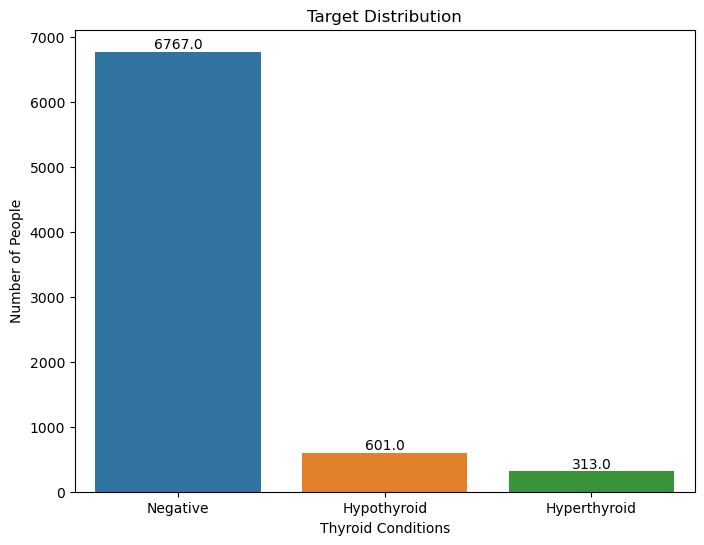

In [ ]:
target_df = df1['target'].value_counts().reset_index()

#Generate a bar plot
plt.figure(figsize = (8,6))
ax = sns.barplot(target_df, x='target', y='count', hue = 'target')

#Loop through each bar patch in the plot
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width()/2
    # Annotate each bar with its corresponding count value
    ax.annotate(
    f'{float(height)}', 
    (p.get_x() + p.get_width() / 2., p.get_height()+1),
    ha='center', 
    va='center', 
    xytext=(0, 5), 
    textcoords='offset points'
    )

# Set the plot title, x-axis label, and y-axis label and display the plot
plt.title('Target Distribution')
plt.xlabel('Thyroid Conditions')
plt.ylabel('Number of People')
plt.show()

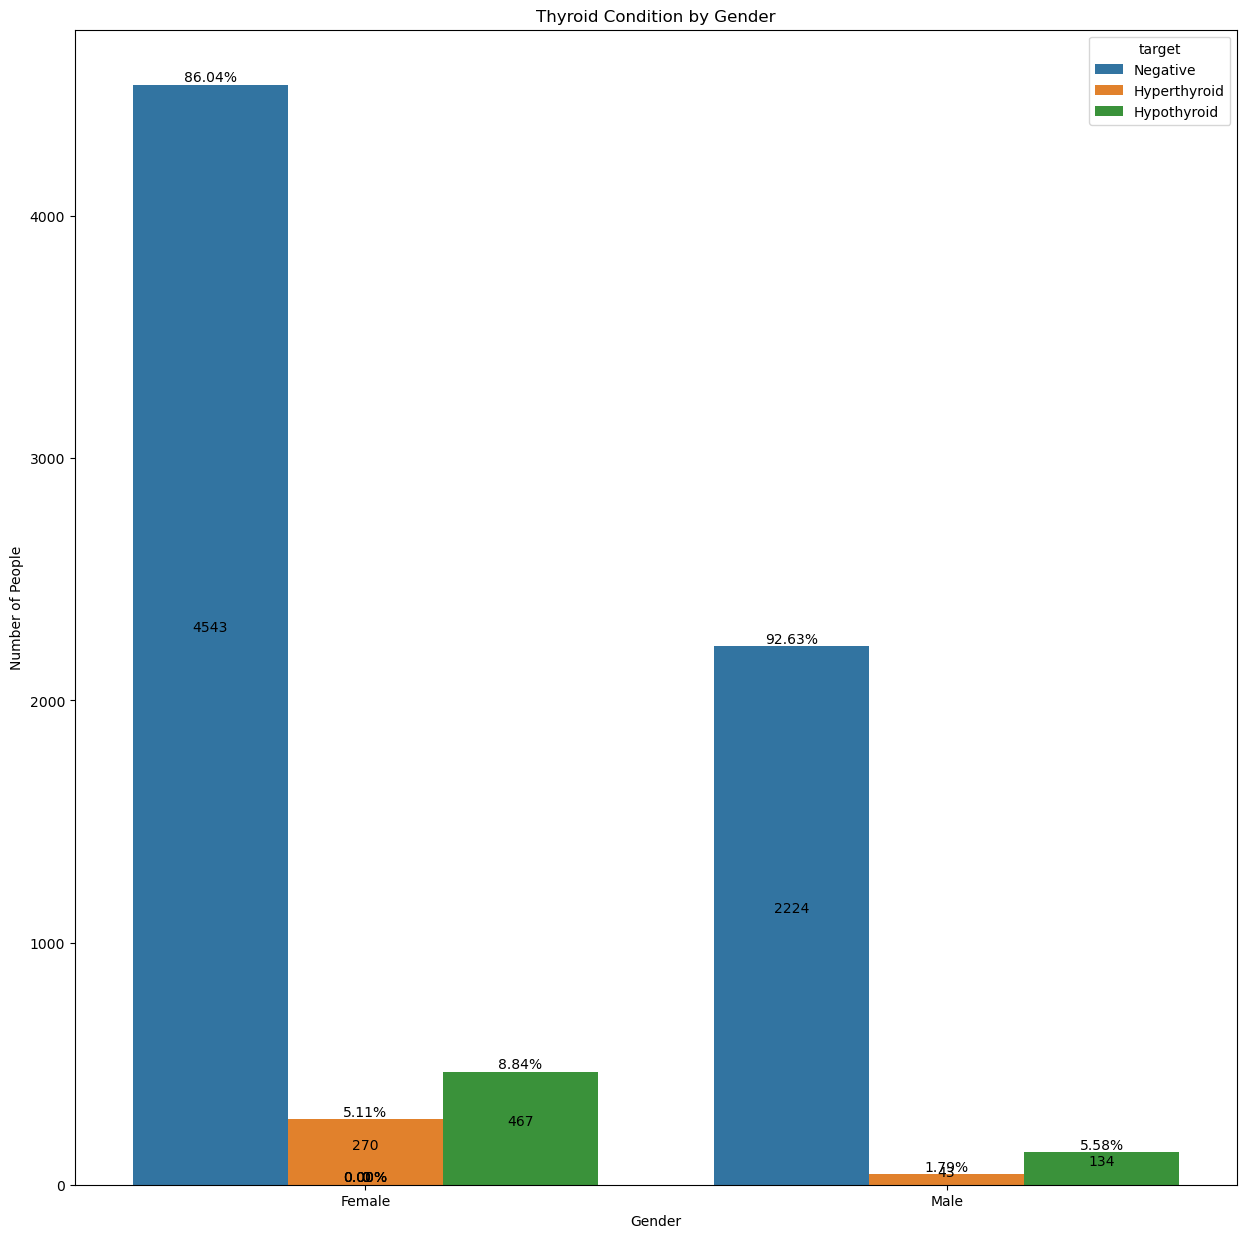

In [ ]:
# Generate Count Plot
plt.figure(figsize = (15,15))
ax = sns.countplot(df1, x = 'sex', hue = 'target')

# Get the total counts for each gender
total_counts = df1['sex'].value_counts()

# Loop through each patch (bar) in the countplot
for p in ax.patches:
    height = p.get_height()
    width = p.get_x() + p.get_width()/2
    if p.get_x()<0.5:
        percentage = height/total_counts['Female'] *100
    else:
        percentage = height/total_counts['Male'] * 100
    # Annotate the percentage value above the bar with some offset
    ax.annotate(
        f'{percentage:.2f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()+1),
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )
    # Annotate the raw count value in the middle of the bar with some offset
    ax.annotate(
        f'{int(height)}', 
        (p.get_x() + p.get_width() / 2., p.get_height()/2),
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

# Set axis labels and title for the plot and display the plot
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.title('Thyroid Condition by Gender')
plt.show()

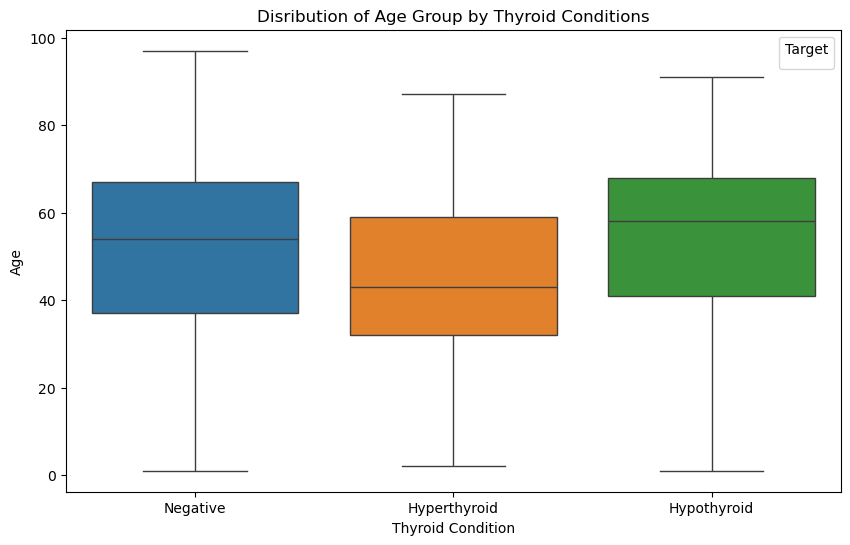

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='age', hue = 'target', )
plt.title('Disribution of Age Group by Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('Age')
plt.legend(loc='best', frameon=True, title = 'Target', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Creating a function for generating the clustered bar chart
def grouped_bar_chart(data, feature, target, title, xlabel): 
    count_data = data.groupby([feature, target]).size().unstack(fill_value=0)
    
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100
    
    percentage_data = percentage_data.reset_index()
    
    # Melt the DataFrame to long format for seaborn
    percentage_melted = percentage_data.melt(id_vars=feature, var_name=target, value_name='Percentage')
    
    # Create the grouped bar plot
    plt.figure(figsize=(8,6))
    sns.barplot(data=percentage_melted, x=feature, y='Percentage', hue=target)
    
    # Annotate percentages on the bars
    for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.2f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     rotation=0, 
                     xytext=(0, 5), textcoords='offset points')
    # Setting titles, labels, legend and then display the plots
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    plt.legend(title='Thyroid Condition')
    plt.tight_layout()
    plt.show()

In [ ]:
# Creating dataframe 'thyroxine_df' by grouping the 'on_thyroxine' and 'target' columns
# and counting the frequency of target classes
thyroxine_df = df1.groupby(['on_thyroxine', 'target'])['target'].count().reset_index(name = 'count')

# Map 'f' and 't' values in 'on_thyroxine' column of 'thyroxine_df' dataframe to 'False' and 'True' respectively
thyroxine_map = {'f':'False', 't':'True'}
thyroxine_df['on_thyroxine']= thyroxine_df['on_thyroxine'].map(thyroxine_map)
thyroxine_df

,on_thyroxine,target,count
0,False,Hyperthyroid,299
1,False,Hypothyroid,576
2,False,Negative,5949
3,True,Hyperthyroid,14
4,True,Hypothyroid,25
5,True,Negative,818


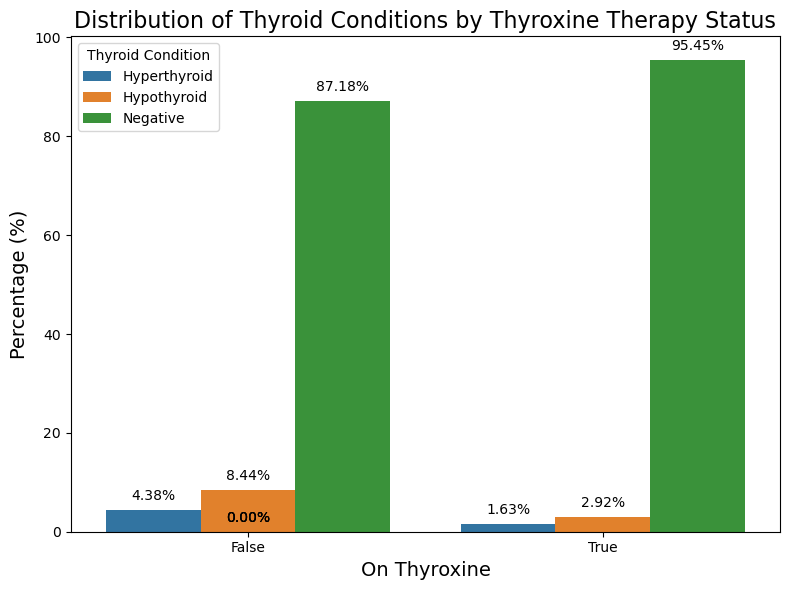

In [ ]:
# Map 'f' and 't' values in 'on_thyroxine' column of 'df1' dataframe to 'False' and 'True' respectively
thyroxine_map = {'f':'False', 't':'True'}
df1['on_thyroxine'] = df1['on_thyroxine'].map(thyroxine_map)

# Creating a clustered bar chart between 'on_thyroxine' and 'target' columns
grouped_bar_chart(data = df1, feature='on_thyroxine', target = 'target', 
                  title = 'Distribution of Thyroid Conditions by Thyroxine Therapy Status',
                  xlabel= 'On Thyroxine'
                 )

In [ ]:
# Map 'f' and 't' values in 'thyroid_surgery' column of 'df1' dataframe to 'False' and 'True' respectively
thyroid_surgery_map = {'f':'False', 't':'True'}
df1['thyroid_surgery'] = df1['thyroid_surgery'].map(thyroid_surgery_map)

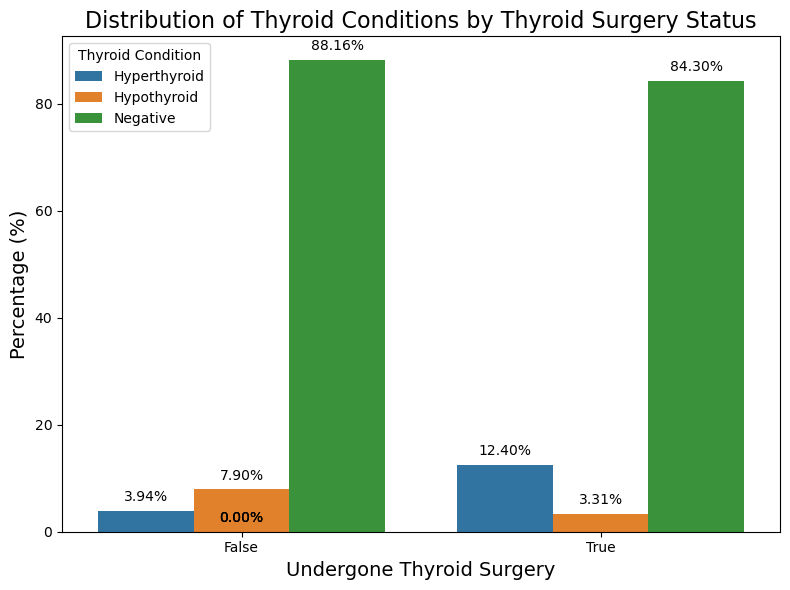

In [ ]:
# Creating a clustered bar chart between 'thyroid_surgery' and 'target' columns
grouped_bar_chart(data=df1, feature='thyroid_surgery', target='target', 
                 title='Distribution of Thyroid Conditions by Thyroid Surgery Status',
                  xlabel='Undergone Thyroid Surgery'
                 )

In [ ]:
# Map 'f' and 't' values in 'I131_treatment' to 'False' and 'True' respectively
bool_map = {'f':'False', 't':'True'}
df1['I131_treatment'] = df1['I131_treatment'].map(bool_map)

In [ ]:
# Creating a dataframe by grouping the 'target' and 'I131_treament' columns and counting the frequency of target
# classes based on whether patients have recieved I131 treatment or not
i131_counts = df1.groupby('target')['I131_treatment'].value_counts().unstack()
i131_counts

I131_treatment,False,True
target,,
Hyperthyroid,302,11
Hypothyroid,588,13
Negative,6645,122


In [ ]:
# Creating a dataframe by grouping the 'target' and 'thyroid_surgery' columns and counting the frequency of target
# classes based on whether patients have recieved surgery or not
surgery_counts = df1.groupby('target')['thyroid_surgery'].value_counts().unstack()
surgery_counts

thyroid_surgery,False,True
target,,
Hyperthyroid,298,15
Hypothyroid,597,4
Negative,6665,102


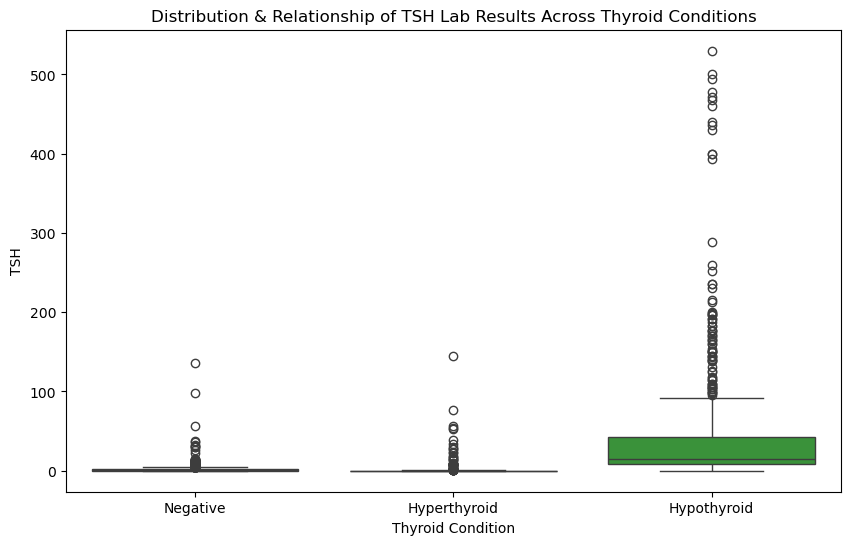

In [ ]:
# Generating customized Box Plot between 'target' and 'TSH' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='TSH', hue = 'target', )
plt.title('Distribution & Relationship of TSH Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('TSH')
plt.show()


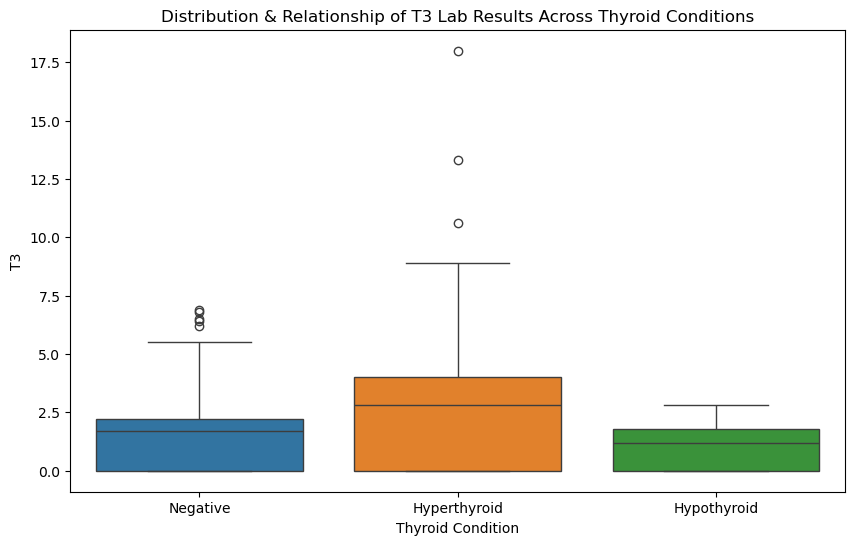

In [ ]:
# Generating customized Box Plot between 'target' and 'T3' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='T3', hue = 'target', )
plt.title('Distribution & Relationship of T3 Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('T3')
plt.show()

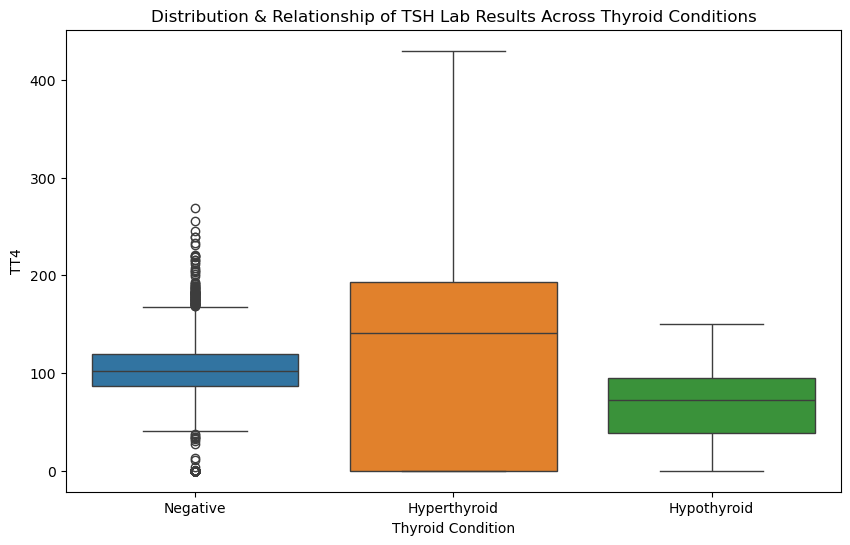

In [ ]:
# Generating customized Box Plot between 'target' and 'TT4' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='TT4', hue = 'target', )
plt.title('Distribution & Relationship of TSH Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('TT4')
plt.show()

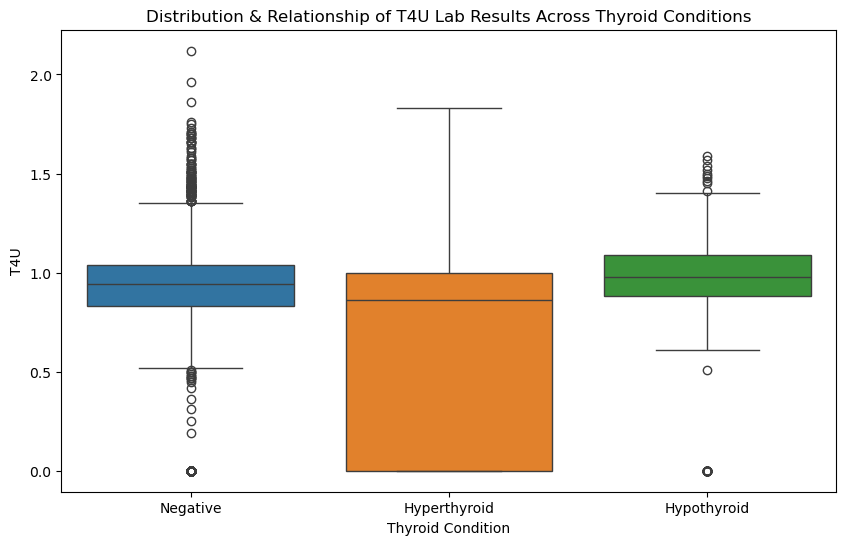

In [ ]:
# Generating customized Box Plot between 'target' and 'T4U' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='T4U', hue = 'target', )
plt.title('Distribution & Relationship of T4U Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('T4U')
plt.show()

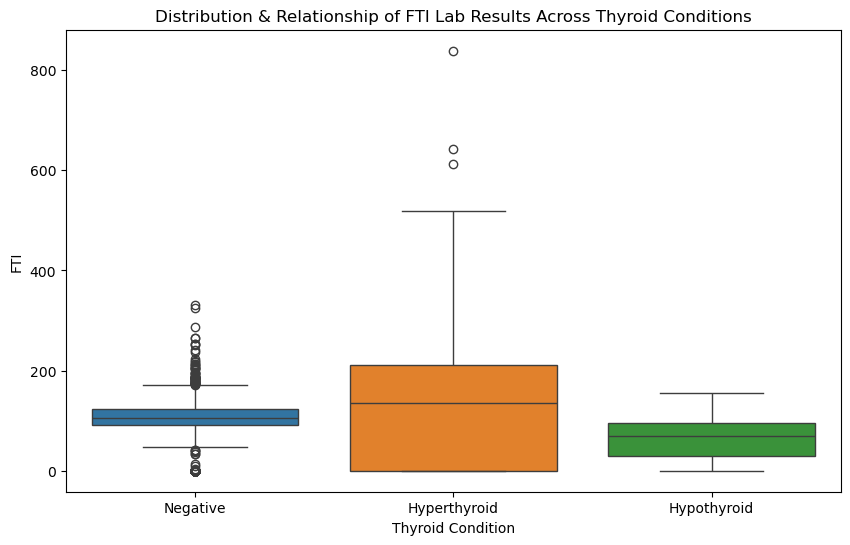

In [ ]:
# Generating customized Box Plot between 'target' and 'FTI' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='FTI', hue = 'target', )
plt.title('Distribution & Relationship of FTI Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('FTI')
plt.show()


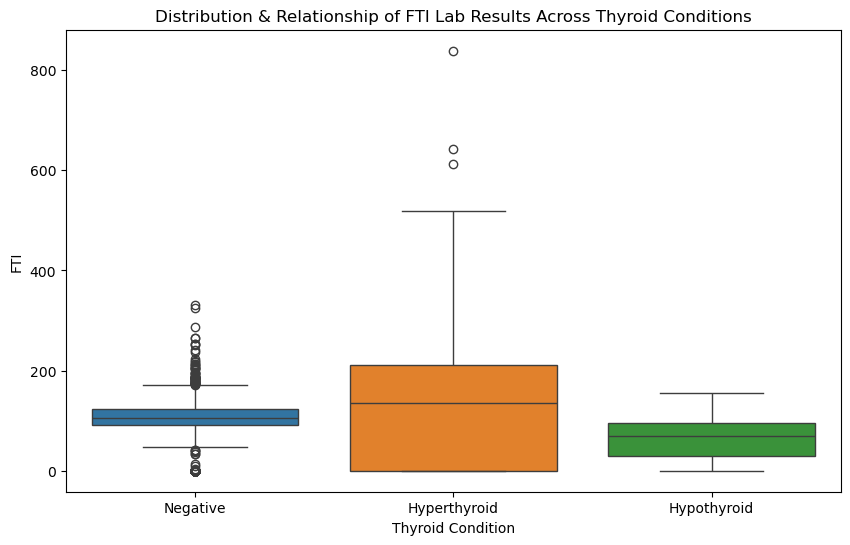

In [ ]:
# Generating customized Box Plot between 'target' and 'FTI' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='FTI', hue = 'target', )
plt.title('Distribution & Relationship of FTI Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('FTI')
plt.show()

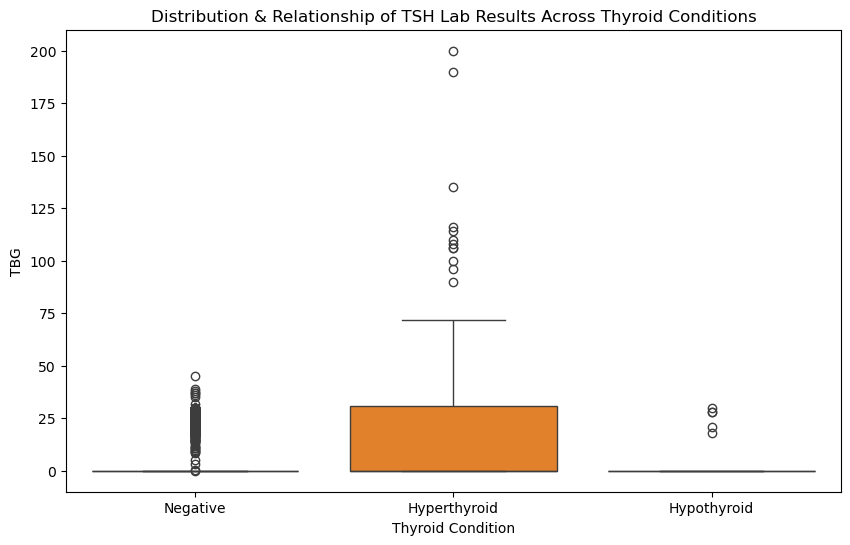

In [ ]:
# Generating customized Box Plot between 'target' and 'TBG' column
plt.figure(figsize = (10,6))
sns.boxplot(df1, x='target', y='TBG', hue = 'target', )
plt.title('Distribution & Relationship of TSH Lab Results Across Thyroid Conditions')
plt.xlabel('Thyroid Condition')
plt.ylabel('TBG')
plt.show()

In [ ]:
df1['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

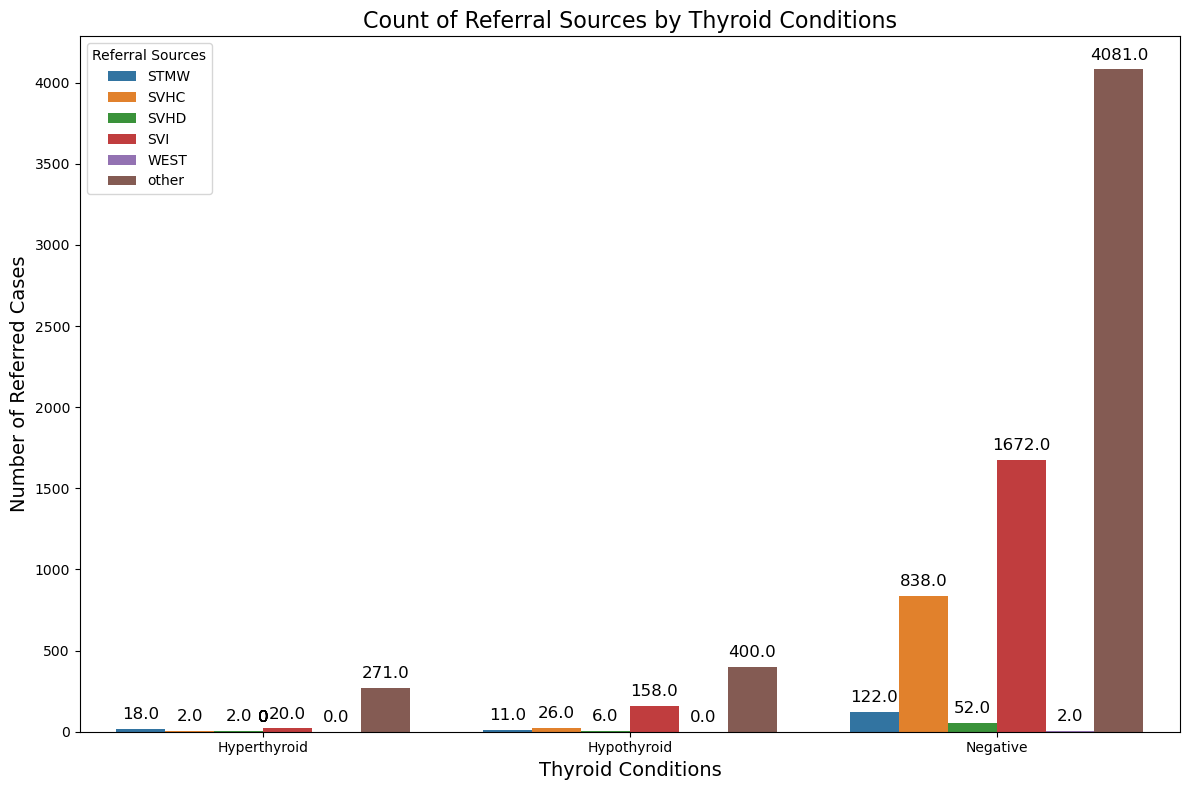

In [ ]:
# Creating dataframe by grouping 'target' and 'referral_source' along with counts of referral sources by target
count_data = df1.groupby(['target', 'referral_source']).size().unstack(fill_value=0)
count_data = count_data.reset_index()

# Melt the data
count_melted = count_data.melt(id_vars='target', var_name='referral_source', value_name='Count')

#Create bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=count_melted, x='target', y='Count', hue='referral_source')

# Annotate bars with count values
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', 
                 fontsize=12, color='black', 
                 rotation=0, 
                 xytext=(0, 5), textcoords='offset points')

# Set labels & titles, adjust and display the plot
plt.title('Count of Referral Sources by Thyroid Conditions', fontsize=16)
plt.xlabel('Thyroid Conditions', fontsize=14)
plt.ylabel('Number of Referred Cases', fontsize=14)
plt.legend(title='Referral Sources')
plt.tight_layout()
plt.show()

In [ ]:
df1['pregnant']=df1['pregnant'].map(bool_map)
df1['pregnant'].unique()

array(['False', 'True'], dtype=object)

In [ ]:
# Creating dataframe containing the records for only female patients
female_df = df1[df1['sex']=='Female']
female_df.shape

(5280, 30)

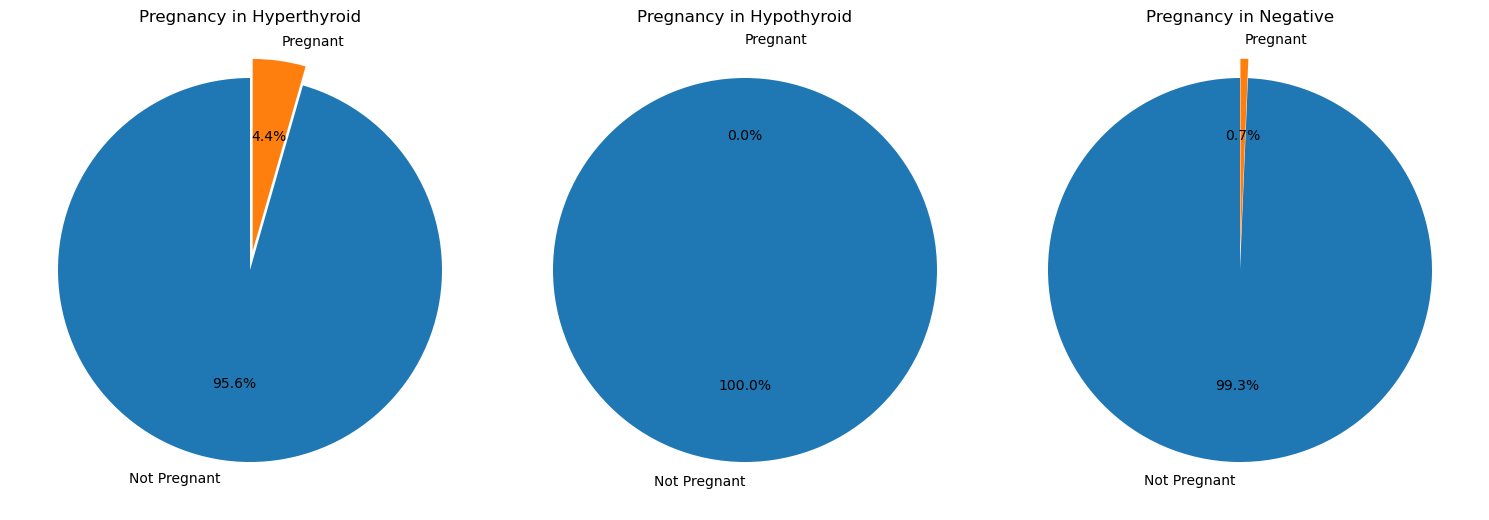

In [ ]:
# Creating dataframe by grouping 'target' and 'pregnant' columns of 'female_df' dataframe
# along with the count of target classes by pregnant and not-pregnant females
count_preg = female_df.groupby(['target', 'pregnant']).size().unstack(fill_value=0)
count_preg = count_preg.reset_index()

# Creating a list containing 'target' classes
target_sorted =  sorted(df1['target'].unique())

#Generating Pie Charts
fig,axes = plt.subplots(1, len(count_preg['target']), figsize = (15,10))

#Annoting the labels
for i, target in enumerate(count_preg.index):
    data = count_preg.loc[i, ['False', 'True']]
    axes[i].pie(data, labels = ['Not Pregnant', 'Pregnant'], autopct = '%1.1f%%',
                 startangle=90, explode = [0, 0.1])
    axes[i].set_title(f"Pregnancy in {target_sorted[i]}")

#Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Splits the DataFrame into features (x) and target variable (y)
x = df.drop('target', axis = 1)
y = df['target']

In [ ]:
# Splitting the data into training and testing sets, maintaining the original class distribution
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6144, 29)
(1537, 29)
(6144,)
(1537,)


In [ ]:
# Creating a function 'au_prc' to plot AU-PRC curve along with Average Precision for each class
def au_prc(y_test_data, y_score_data):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Binarize the labels for multi-class OvR
    classes = np.unique(y_test_data)
    y_true_binarized = label_binarize(y_test_data, classes=classes)
    
    # Store precision-recall metrics for each class
    precision_dict = {}
    recall_dict = {}
    average_precision_dict = {}
    
    for i, class_label in enumerate(classes):
        precision_dict[class_label], recall_dict[class_label], _ = precision_recall_curve(
            y_true_binarized[:, i], y_score_data[:, i]
        )
        average_precision_dict[class_label] = average_precision_score(
            y_true_binarized[:, i], y_score_data[:, i]
        )
    
    # Compute micro-average PR curve
    precision_micro, recall_micro, _ = precision_recall_curve(
        y_true_binarized.ravel(), y_score_data.ravel()
    )
    average_precision_micro = average_precision_score(y_true_binarized, y_score_data, average="micro")
    
    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    for class_label in classes:
        plt.plot(
            recall_dict[class_label], 
            precision_dict[class_label], 
            label=f"Class {class_label} (AP = {average_precision_dict[class_label]:.2f})"
        )
    
    # Add micro-average curve
    plt.plot(
        recall_micro, 
        precision_micro, 
        label=f"Micro-Average (AP = {average_precision_micro:.2f})", 
        color='gold', linestyle='--'
    )
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve for Multi-Class Classification")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


 [[   0    0   63]
 [   0    0  120]
 [   0    0 1354]]

Accuracy: 0.8809368900455433

Class Hyperthyroid: Average Precision = 0.046525400105399614
Class Hypothyroid: Average Precision = 0.07360023173744554
Class Negative: Average Precision = 0.8784050496559289
Micro-average Precision Score: 0.8391203655695787


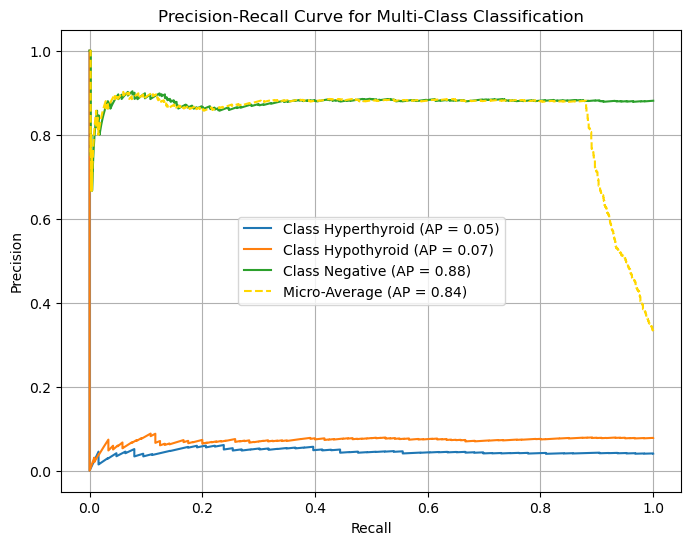

In [ ]:
from sklearn.linear_model import LogisticRegression

#List of columns with continuous values and the copies of x_train and x_test
col_to_encode = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
x_train_lr = x_train.copy()
x_test_lr = x_test.copy()

#Creating object for the class Standard Scaler
sc = StandardScaler()

# Transform the values of columns in 'col_to_encode' for both training and test features
x_train_lr[col_to_encode] = sc.fit_transform(x_train_lr[col_to_encode])
x_test_lr[col_to_encode] = sc.transform(x_test_lr[col_to_encode])

# Training Logistic Regression
lr = LogisticRegression()
lr.fit(x_train_lr, y_train)

# Making Predictions
y_pred = lr.predict(x_test_lr)
y_score = lr.predict_proba(x_test_lr)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  48    4   11]
 [   1  117    2]
 [   7    3 1344]]

Accuracy: 0.9817826935588809

Class Hyperthyroid: Average Precision = 0.9475517045645092
Class Hypothyroid: Average Precision = 0.9961859414214963
Class Negative: Average Precision = 0.9998176734842454
Micro-average Precision Score: 0.9991634258759318


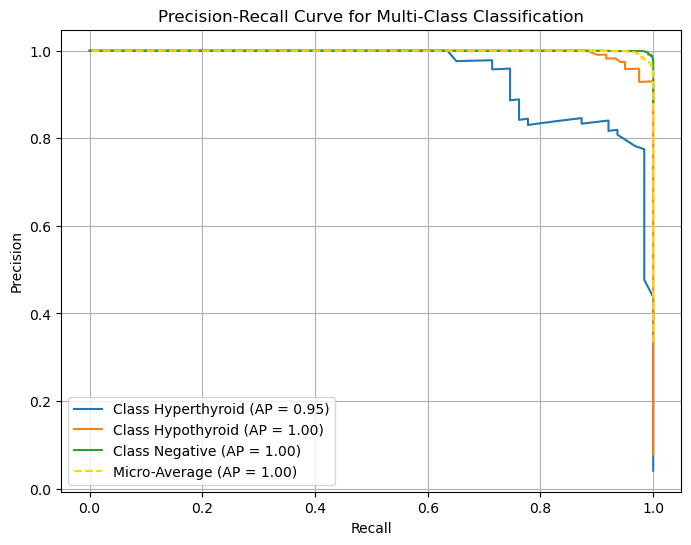

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Making Predictions
y_pred = rf.predict(x_test)
y_score = rf.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  46    4   13]
 [   0  117    3]
 [   2    3 1349]]

Accuracy: 0.9837345478204295

Class Hyperthyroid: Average Precision = 0.9485710541347214
Class Hypothyroid: Average Precision = 0.9929363042220739
Class Negative: Average Precision = 0.9998762970144206
Micro-average Precision Score: 0.9991549549844752


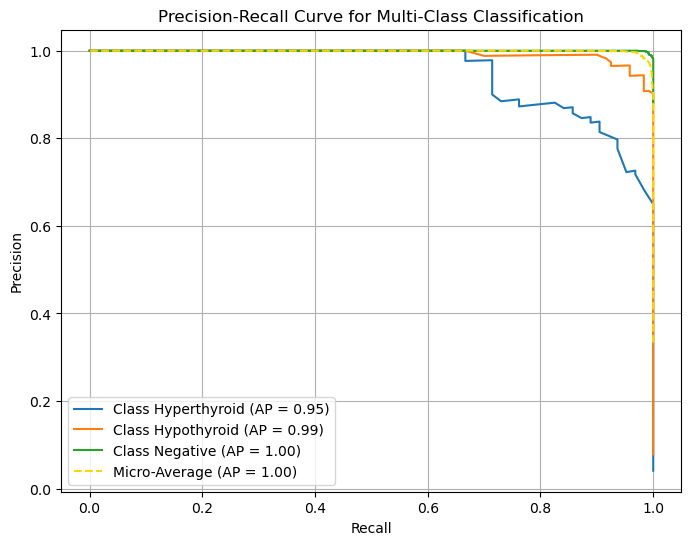

In [ ]:
# Training Random Forest Clssifier with customized Class Weights
rf2 = RandomForestClassifier(random_state=42, class_weight={'Hyperthyroid':1500, 'Hypothyroid':100, 'Negative':25})
rf2.fit(x_train, y_train)

# Making Predictions
y_pred = rf2.predict(x_test)
y_score = rf2.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  44    3   16]
 [   1   88   31]
 [   6    1 1347]]

Accuracy: 0.9622641509433962

Class Hyperthyroid: Average Precision = 0.9042528406056101
Class Hypothyroid: Average Precision = 0.9640113777415182
Class Negative: Average Precision = 0.9992722204360531
Micro-average Precision Score: 0.9960333399848611


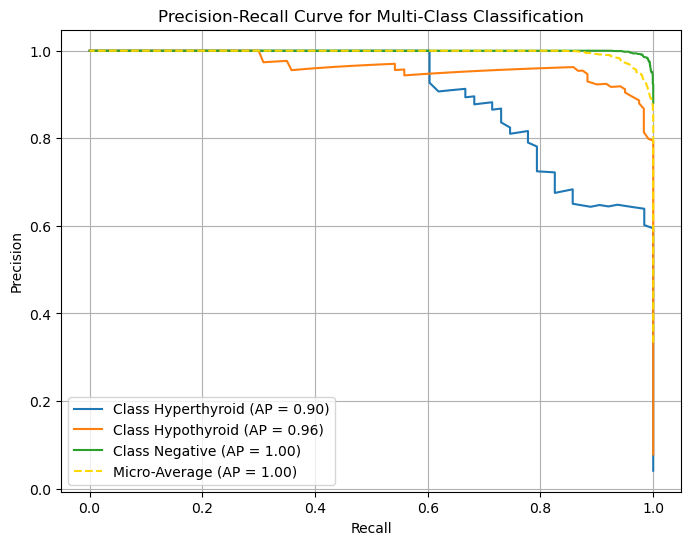

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#Training the Extra Tree Classifier
etc = ExtraTreesClassifier(random_state=42)
etc.fit(x_train, y_train)

# Making Predictions
y_pred = etc.predict(x_test)
y_score = etc.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  61    1    1]
 [   3  114    3]
 [  16    4 1334]]

Accuracy: 0.9817826935588809

Class Hyperthyroid: Average Precision = 0.8999450516366426
Class Hypothyroid: Average Precision = 0.9937341975633192
Class Negative: Average Precision = 0.9996877165365603
Micro-average Precision Score: 0.9963285128053309


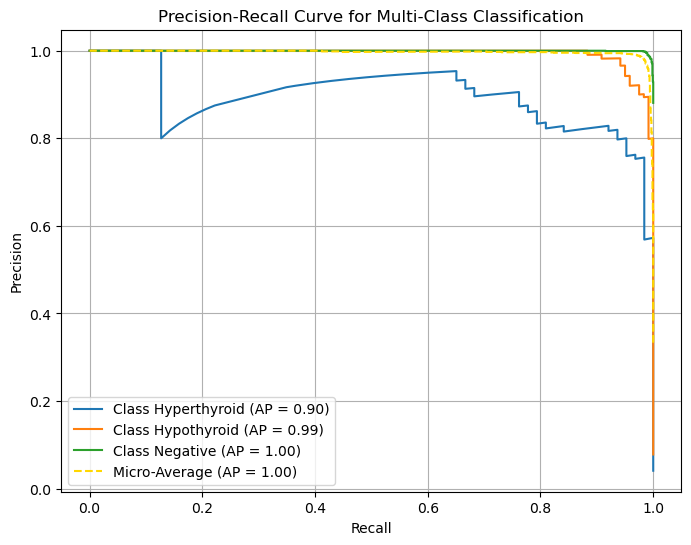

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import GradientBoostingClassifier

# Compute sample weights to balance the classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Train the GradientBoostingClassifier with the sample weights
gb = GradientBoostingClassifier(random_state=10)
gb.fit(x_train, y_train, sample_weight=sample_weights)

# Making Predictions
y_pred = gb.predict(x_test)
y_score = gb.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
# Micro Average Precision (unweighted mean)
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)


 [[  51    4    8]
 [   0  117    3]
 [   8    1 1345]]

Accuracy: 0.9843851659076123

Class Hyperthyroid: Average Precision = 0.9552269137317984
Class Hypothyroid: Average Precision = 0.9959066316901775
Class Negative: Average Precision = 0.9998893262765934
Micro-average Precision Score: 0.9994180588953521


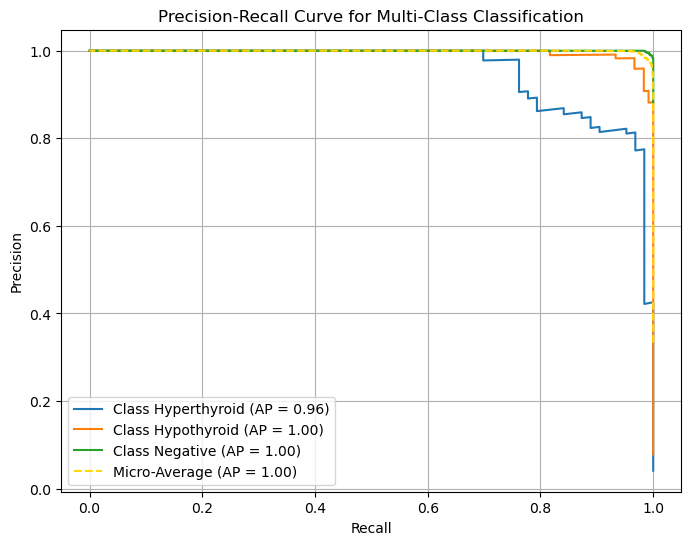

: 

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier

# Mapping the Encoded Target values to Different Classes of Thyroid Conditions
target_map = {'Hyperthyroid':0, 'Hypothyroid':1, 'Negative':2}
y_train_encoded = y_train.map(target_map)
y_test_encoded = y_test.map(target_map)

# Compute sample weights to balance the classes
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_encoded)

# Train the XGBoostingClassifier with the sample weights
xgb = XGBClassifier(random_state=10)
xgb.fit(x_train, y_train_encoded, sample_weight=sample_weights)

# Making Predictions
y_pred = xgb.predict(x_test)
y_score = xgb.predict_proba(x_test)

# Binarize the target for multiclass precision
y_test_binarized = label_binarize(y_test, classes=lr.classes_)

#Evaluate
print(f'\n {confusion_matrix(y_test_encoded, y_pred)}\n')
print(f'Accuracy: {accuracy_score(y_test_encoded, y_pred)}\n')
# Compute Average Precision Score for each class
average_precisions = []
for i, class_label in enumerate(lr.classes_):
    avg_precision = average_precision_score(y_test_binarized[:, i], y_score[:, i])
    average_precisions.append(avg_precision)
    print(f'Class {class_label}: Average Precision = {avg_precision}')
print(f"Micro-average Precision Score: {average_precision_score(y_test_binarized, y_score, average='micro')}")
au_prc(y_test_data= y_test, y_score_data= y_score)